In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Загрузка датасета###

In [ ]:
file_path = r"/content/drive/MyDrive/ЭкоТомск/practice3/bankruptcy_data.csv"
data = pd.read_csv(file_path, index_col = 0)

###Получение основной информации о данных###

In [ ]:
data.head(10)

Колонки Название, Регистрационный номер и Код налогоплатильщика стоит удалить перед обучением модели, так как они не несут полезной информации. Дата банкротства была необходима для формирования целефой колонки и то же может быть удалена

In [ ]:
data.shape

(2846300, 41)

In [ ]:
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846300 entries, 0 to 3104783
Data columns (total 41 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   Наименование                                       2846300 non-null  object 
 1   Регистрационный номер                              2846300 non-null  float64
 2   Код налогоплательщика                              2846300 non-null  float64
 3   Вид деятельности/отрасль                           2846300 non-null  object 
 4   Код основного вида деятельности                    2846300 non-null  object 
 5   Организационно-правовая форма                      2846300 non-null  object 
 6   Форма собственности                                2846300 non-null  object 
 7   Размер компании                                    2846258 non-null  object 
 8   Важная информация                                  337634 non-

Среди значений некоторых атрибутов(Доходы будующих периодовб, Расходы, Проценты) имеется очень много пропусков, возможно стоит удалить такие колонки

In [ ]:
data.describe(include='all')

,Наименование,Регистрационный номер,Код налогоплательщика,Вид деятельности/отрасль,Код основного вида деятельности,Организационно-правовая форма,Форма собственности,Размер компании,Важная информация,Год,...,"Прибыль (убыток) от продажи, RUB","Проценты к получению, RUB","Проценты к уплате, RUB","Прочие доходы, RUB","Прочие расходы, RUB","Прибыль (убыток) до налогообложения , RUB","Текущий налог на прибыль, RUB","Чистая прибыль (убыток), RUB",Дата банкротства,Банкротство
count,2846300,2.846300e+06,2.846300e+06,2846300,2846300,2846300,2846300,2846258,337634,2846300.0,...,2.665085e+06,1.756650e+05,3.353810e+05,1.215384e+06,2.357413e+06,2.615447e+06,1.888376e+06,2.644839e+06,20980,2.846300e+06
unique,814844,NaN,NaN,2187,2274,17,7,4,64107,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN
top,"ВЕКТОР, ООО",NaN,NaN,Строительство жилых и нежилых зданий,41.20,Общества с ограниченной ответственностью,Частная собственность,Микропредприятия,Регистрирующим органом принято решение о предс...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-27,NaN
freq,3954,NaN,NaN,169564,147226,2770682,2835844,2558530,1182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992,NaN
mean,NaN,1.223658e+12,5.452348e+09,NaN,NaN,NaN,NaN,NaN,NaN,2019.5,...,3.837170e+06,4.988463e+06,5.322106e+06,1.259265e+07,6.859203e+06,3.956859e+06,-9.280853e+04,3.317357e+06,NaN,1.784000e-02
std,NaN,6.169736e+11,2.376860e+09,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,1.000618e+08,1.211765e+08,7.692691e+07,1.279879e+09,8.033771e+08,5.206123e+08,3.943380e+07,5.143539e+08,NaN,2.127049e-01
min,NaN,1.001602e+12,1.000018e+08,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,...,-2.039220e+10,-5.746600e+07,-8.240000e+05,-3.956140e+08,-2.021000e+06,-4.813755e+10,-4.423400e+10,-4.447089e+10,NaN,0.000000e+00
25%,NaN,1.083254e+12,3.528061e+09,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,...,2.900000e+04,2.900000e+04,5.700000e+04,3.100000e+04,3.000000e+04,1.900000e+04,-9.000000e+03,8.000000e+03,NaN,0.000000e+00
50%,NaN,1.143256e+12,5.903107e+09,NaN,NaN,NaN,NaN,NaN,NaN,2019.5,...,3.430000e+05,2.030000e+05,3.140000e+05,2.550000e+05,1.090000e+05,2.740000e+05,3.200000e+04,2.010000e+05,NaN,0.000000e+00
75%,NaN,1.177746e+12,7.709930e+09,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,...,1.950000e+06,1.205000e+06,1.612000e+06,1.902000e+06,6.970000e+05,1.651000e+06,1.770000e+05,1.351000e+06,NaN,0.000000e+00


Имеет смысл в дальнейшем перевести категориальные атрибуты (Вид деятельности, Организационно-правовая форма, Форма собственности и Размер компании) в числовые. Важная информация обычно говорит об наличии у компании определенных проблем, так что имеет смысл перевести этот атрибут в числовой со значениями 0 или 1(нет информации или есть).

###Просмотр информации о категориальных атрибутах###

In [ ]:
data["Организационно-правовая форма"].value_counts()

Общества с ограниченной ответственностью                                                   2770682
Непубличные акционерные общества                                                             52498
Публичные акционерные общества                                                                8158
Сельскохозяйственные производственные кооперативы                                             5826
Крестьянские (фермерские) хозяйства                                                           5344
Производственные кооперативы (кроме сельскохозяйственных производственных кооперативов)       1884
Сельскохозяйственные артели (колхозы)                                                         1032
Товарищества на вере (коммандитные товарищества)                                               214
Рыболовецкие артели (колхозы)                                                                  210
Производственные кооперативы (артели)                                                          170
Полные тов

In [ ]:
data["Форма собственности"].value_counts()

Частная собственность                                                                                                   2835844
Иная смешанная российская собственность                                                                                    3994
Смешанная российская собственность с долей федеральной собственности                                                       2620
Смешанная российская собственность с долей собственности субъектов Российской Федерации                                    1612
Собственность потребительской кооперации                                                                                   1244
Собственность российских граждан, постоянно проживающих за границей                                                         868
Смешанная российская собственность с долями федеральной собственности и собственности субъектов Российской Федерации        118
Name: Форма собственности, dtype: int64

In [ ]:
data["Размер компании"].value_counts()

Микропредприятия       2558530
Малые предприятия       247624
Средние предприятия      33920
Крупные предприятия       6184
Name: Размер компании, dtype: int64

Имеет смысл в дальнейшем перевести номинальные атрибуты в числовые. Значения в этих атрибутах несбалансированы.

###Изучения целевого атрибута###

In [ ]:
num_bankrupt = data[(data['Банкротство'] != 0)]['Банкротство'].count()/2
print(f"Число уникальных компаний банкротов: {num_bankrupt}")

Число компаний банкротов: 10490.0


In [ ]:
data["Банкротство"].value_counts()/2

0    1412660.0
2       5245.0
3       4827.0
1        418.0
Name: Банкротство, dtype: float64

Целевые данные очень несбалансированы. Необходимо их нормализовать.

###Выявление зависимостей###

In [ ]:
num_columns = data.loc[:,"Основные средства , RUB":"Чистая прибыль (убыток), RUB"]
num_columns.head()

,"Основные средства , RUB","Внеоборотные активы, RUB","Запасы, RUB","Дебиторская задолженность, RUB","Краткосрочные финансовые вложения, RUB","Денежные средства и денежные эквиваленты, RUB","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Капитал и резервы, RUB",...,"Коммерческие расходы, RUB","Управленческие расходы, RUB","Прибыль (убыток) от продажи, RUB","Проценты к получению, RUB","Проценты к уплате, RUB","Прочие доходы, RUB","Прочие расходы, RUB","Прибыль (убыток) до налогообложения , RUB","Текущий налог на прибыль, RUB","Чистая прибыль (убыток), RUB"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,297000.0,76000.0,NaN,73000.0,478000.0,478000.0,-1151000.0,-1141000.0,...,129000.0,NaN,-58000.0,NaN,NaN,NaN,11000.0,-69000.0,NaN,-69000.0
2,NaN,NaN,NaN,2526000.0,NaN,NaN,2526000.0,2526000.0,2486000.0,2496000.0,...,NaN,487000.0,264000.0,NaN,NaN,NaN,17000.0,247000.0,-29000.0,218000.0
3,NaN,NaN,NaN,NaN,NaN,22000.0,22000.0,22000.0,NaN,NaN,...,47000.0,NaN,19000.0,NaN,NaN,NaN,7000.0,12000.0,NaN,12000.0
4,17000.0,17000.0,NaN,NaN,NaN,NaN,NaN,17000.0,NaN,17000.0,...,NaN,NaN,135000.0,NaN,NaN,NaN,NaN,135000.0,NaN,135000.0


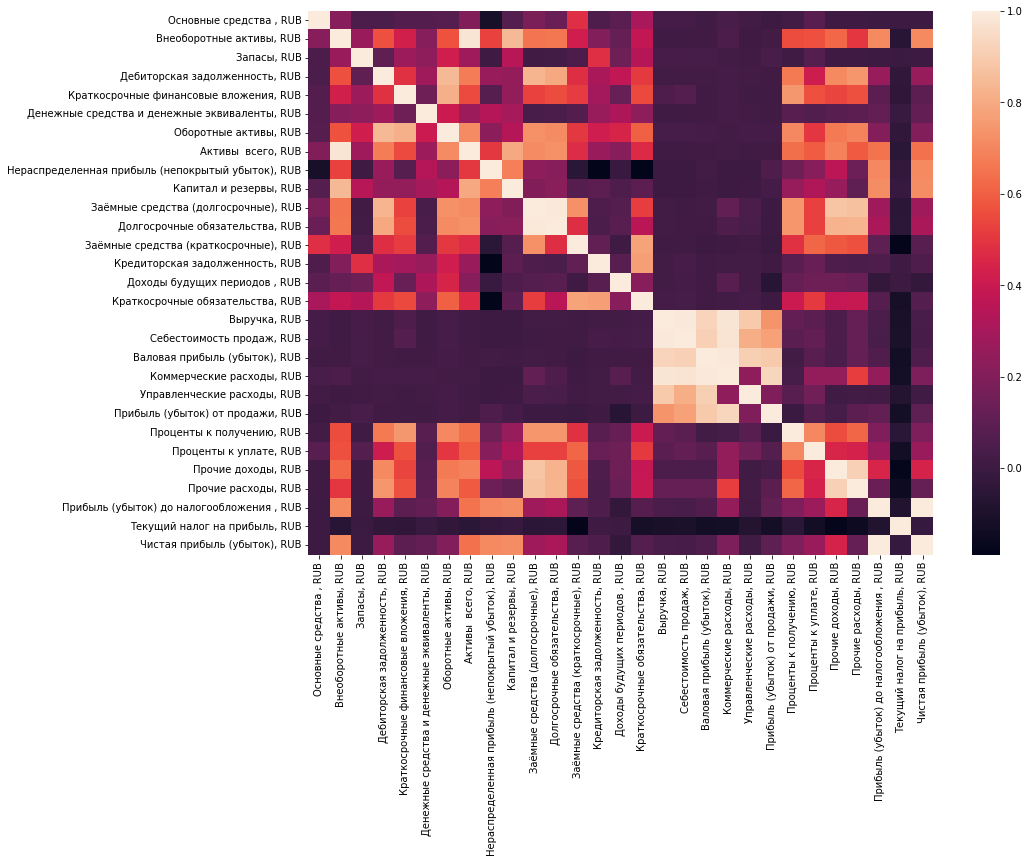

In [ ]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(num_columns.corr())

Из карты видно, что между некоторыми атрибутами, например между Выручкой, Себестоимостью, Валовой прибылью и Комерческими расходами, существуют сильные зависимости. Это означает, что некоторые из этих атрибутов можно удалить из выборки для улучшения модели, но пока их оставим.